In [1]:
#| default_exp maps

# EVCI maps

> **API**: The API includes functions to read shapfiles and render them. The rendered outputs can be saved as images.

In [2]:
#|hide
from nbdev.showdoc import *

In [3]:
#|export

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import shapely
import os

import pandas as pd
import tqdm

from evci_tool.config import *

import warnings
warnings.filterwarnings("ignore")

In [4]:
#|export

def show_map(corridor:str):
    "This function reads corresponding shape file and plots the points"
    
    m,s,t,g,INPUT_PATH,OUTPUT_PATH = setup_and_read_data (corridor)

    s_df = gpd.read_file(INPUT_PATH + 'shape_files/' + corridor + '.shp')

    data = s['sites']
    data['Latitude'] = pd.to_numeric(data['Latitude'])
    data['Longitude'] = pd.to_numeric(data['Longitude'])
    data['geometry'] = [shapely.geometry.Point(xy) for xy in zip(data['Longitude'],
    data['Latitude'])]

    #@title Create grid
    # total area for the grid
    xmin, ymin, xmax, ymax= s_df.total_bounds
    print('Bounding box: ', xmin,xmax,ymin,ymax)
    # how many cells across and down
    n_cells=30
    cell_size = (xmax-xmin)/n_cells

    crs = s_df.crs

    grid_cells = []
    for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
        for y0 in np.arange(ymin, ymax+cell_size, cell_size):
            # bounds
            x1 = x0-cell_size
            y1 = y0+cell_size
            grid_cells.append( shapely.geometry.box(x0, y0, x1, y1) )
    cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs=crs)

    grid_s_df = gpd.overlay(s_df, cell, how='intersection')
    
    data_df = {}
    data_df = gpd.GeoDataFrame(data,geometry=data['geometry'])

    #total area
    s_df['geometry'].to_crs(6933).map(lambda p: p.area/ 1e6).loc[0]

    # plot the grid and the shapefiles
    base = grid_s_df.plot(color='none', edgecolor='grey', alpha=0.4, figsize=(12,8))
    s_df.plot(ax=base, color='none', edgecolor='black')
    
    data_df.plot(ax=base, markersize=100, legend=True)

`Arguments`:

`corridor`: a string describing the corridor to be analyzed

`Returns`:

None

Bounding box:  72.8340551 74.8596963 15.1400364 19.2505157


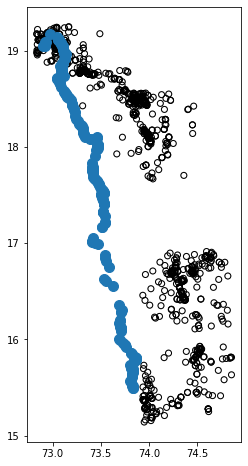

In [5]:
show_map("mumbai_goa")